# SVM
* large margin classification : 마진이 가장 넓은 모델을 선택
* support vector : 경계 최외곽에  위치한 샘플
* 스케일에 민감
    * 스케일이 서로 다르면 마진이 작아진다.

In [3]:
from matplotlib.colors import ListedColormap
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None,
                           alpha=1, cm=cm3):
    # multiclass
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

/Users/rainer/Dropbox/work/ml_dl/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


result, 0=red, 1=blue: [1]



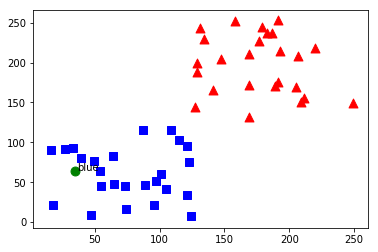

In [18]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.svm import SVC

x = np.random.randint(0,125,(25,2))
y = np.random.randint(126, 255,(25,2))
trainData = np.vstack((x,y))
trainData = np.float32(trainData)
responses = np.zeros((50,1), np.int32)
responses[0:25] = 1
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

newcomer = np.random.randint(0,255,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

svm = SVC()
svm.fit(trainData, responses.ravel())

#plot_2d_classification(svm, trainData)

results = svm.predict(newcomer)
plt.annotate('red' if results[0]==0.0 else 'blue', xy=newcomer[0],
xytext=(newcomer[0]+1))
print("result, 0=red, 1=blue: {}\n".format(results))
plt.show()

## 소프트 마진 분류
* 샘플에 이상치가 있으면 일반화가 되지 않는다.
* C 하이퍼파라미터로 조정
    * 마진오류 : 서포트 벡터 넘어 경계 마진 안에 샘플이 위치하는 현상
    * C 값이 작으면 마진 오류 커져(마진이 커짐), 일반화
    * C 값이 크면 마진 오류 작아져(경계 마진이 작아짐), 과대적합

## 비선형 및  커널 함수
* 다항식 추가
    * 비선형인 경우 특성을 2차식으로 추가 $x_2 = (x_1)^2$ 2차원 특성 생성
    * 다항식 특성 추가가 많아지면 연산이 복잡해져서 느려진다.

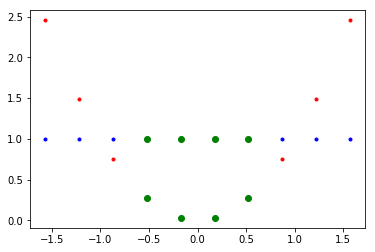

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

x = np.arange(10, dtype=np.float32)
y = np.ones(10)

x -= np.mean(x)
x /= np.std(x, axis=0)
plt.plot(x,y, '.b')
plt.plot(x[3:7], y[3:7], 'og')

x2 = (x**2)
plt.plot(x,x2, '.r')
plt.plot(x[3:7],x2[3:7], 'og')


* 커널 트릭
    * 실제로 아무 특성도 추가하지 않으면서 다항식 특성을 많이 추가한 효과
    * 커널 함수로 거리 값을 계산
    * 생성자에 kernel 함수 전달
        * linear: $(x, x')$
            * `SVC(kernel='liner')`
        * polynomial: $(\gamma(x, x') + r)^d$, $d$ =degree, $\gamma$ =coef0 로 전달
            * `SVC(kernel='ploy', degree=3, coef0=1, C=5)`
                * degree : 다항식 차수
                * coef0=0 : 다항식 커널의 상수항 $r$, 차수가 높아지면 1보다 크고 작은 값의 격차가 커짐, 고차항의 영향 조절
        * rbf: $exp(\gamma||x-x'||^2)$ $\gamma$=gamma 0보다 큰 수
            * `SCV(kernel='rbf', gamma=5, C=0.001)`
        * sigmoid : $(tanh(\gamma(x, x') + r))$, $r$은 coef0로 전달
            * `SVC(kernel='sigmoid')`

# SVM 손글씨 인식

In [92]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

svm = SVC(kernel='rbf',C=1,  gamma=0.001)
#svm = SVC(kernel='poly', degree=2, coef0=0.5, C=1, gamma=0.01)

svm.fit(X_train,y_train)

print("Train Accuracy :", svm.score(X_train, y_train))
print("Test Accuracy1 :", svm.score(X_test, y_test))

Train Accuracy : 0.9993041057759221
Test Accuracy1 : 0.9916666666666667


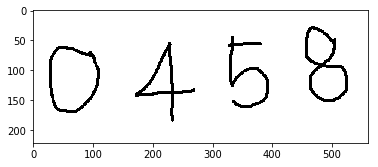

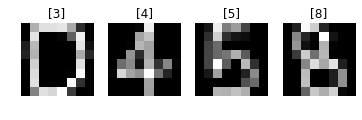

In [91]:
import img2data

image = cv2.imread('./img/0458.png')
plt.imshow(image)
plt.show()
numbers = img2data.img2digits(image, (8,8))
for i, n in enumerate(numbers):
    pred = svm.predict(n/255*16)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")